# Forest Recovery

Can we predict recovery times from a forest fire? What makes for a fastest recovery?

Data:
- Landsat/Copernicus Level-1 at different times.
- Satellogic Hyperspectral where available.
- Historical Hyperion where available.

Concept:

Take data from right before a fire to after it's fully recovered. Use the hyperspectral and temporal information to adjust to a recovery interpolation. Once done, it should be possible to map quick recoveries and what makes them so.

In [ ]:
#Mapping the region under study

In [ ]:
#Collecting Landsat/Copernicus data for the RoI

In [ ]:
#Collecting Satellogic data for the RoI

In [11]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
%matplotlib inline
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import sys
import argparse
import os
from os import listdir
from os.path import isfile, join
import tifffile as tiff
from PIL import Image
from IPython.html.widgets import interact


def load_tiff_datacube(path, filenames):
  
    data0 = tiff.imread(os.path.join(path, filenames[0]))  
    data = np.empty(( np.shape(data0) + (len(filenames),) ))   

    for f, fil in enumerate(filenames[1:], start=1):     
        data[:,:,f] = tiff.imread(os.path.join(path, fil))
    data[:,:,0] = data0            
    return data


def load_tiff_datacube_roi(path, filenames, roi_init, roi_size):
  
    data0 = tiff.imread(os.path.join(path, filenames[0]))[roi_init[0]:roi_init[0] + roi_size[0], 
                                                          roi_init[1]:roi_init[1] + roi_size[1]]  
    data = np.empty(( np.shape(data0) + (len(filenames),) ))   

    for f, fil in enumerate(filenames[1:], start=1):     
        data[:,:,f] = tiff.imread(os.path.join(path, fil))[roi_init[0]:roi_init[0] + roi_size[0], 
                                                           roi_init[1]:roi_init[1] + roi_size[1]]
    data[:,:,0] = data0            
    return data


def load_png_datacube(path, filenames):
  
    data0 = np.asarray(Image.open(os.path.join(path, filenames[0]))) 
    data = np.empty(( np.shape(data0) + (len(filenames),) ))   

    for f, fil in enumerate(filenames[1:], start=1):     
        data[:,:,f] = data[:,:,f] = np.asarray(Image.open(os.path.join(path, fil)))
    data[:,:,0] = data0            
    return data


def load_png_datacube_roi(path, filenames, roi_init, roi_size):
   
    data0 = np.asarray(Image.open(os.path.join(path, filenames[0])))[roi_init[0]:roi_init[0] + roi_size[0], 
                                                                     roi_init[1]:roi_init[1] + roi_size[1]]  
   
    data = np.empty(( np.shape(data0) + (len(filenames),) ))   

    for f, fil in enumerate(filenames[1:], start=1):     
        data[:,:,f] = data[:,:,f] = np.asarray(Image.open(os.path.join(path, fil)))[roi_init[0]:roi_init[0] + roi_size[0], 
                                                                                    roi_init[1]:roi_init[1] + roi_size[1]]
    data[:,:,0] = data0            
    return data

def plot_image(wav):
    plt.figure(figsize=(8,8))
    plt.imshow(dataset[:,:,wav],cmap='gray', interpolation='none', vmin=dataset.min(), vmax=dataset.max())
    axes = plt.gca()
    plt.title('Intensity for spectral band %d'% wav_data[wav] + 'nm')
    plt.colorbar()

# Create dictionaries with the desired datasets:


In [3]:
###################
# Satellogic Data:
###################

sate_example1 = {'sate_files_dir' : '/home/agus/ownCloud/Satellogic_agus/micro_calibration/imagenes_micro_repo/SL_newsat1_3900f149ea7745cbb5d6d75b6f5c9a8f71f044cd-HyperCube/rasters',                 # help = Path to Satellogic hypercube npz file
            'metadata_exp' : 1,                     # Exposure time (in metadata units)
            'additional_gain' : 4.833821157191273,                    # Gain correction factor (DIQ pipeline)
            'sate_roi_pixel_i' : [2628,2127],            # Initial ROI pixel / format = [row0, col0]             
            'sate_roi_size' : [20,20]}                # ROI height and width / format = [height, width]     


#################
# Hyperion Data:
#################
    
hyperion_example1 = {'hyperion_files_dir' : '/home/agus/Desktop/Hyperion/Hyperion_downloads/Frenchman_flat/EO1H0400342017027110PF (2)/slices', 
                'hyp_roi_pixel_i' : [1734,450],             # Initial ROI pixel / format = [row0, col0]
                'hyp_roi_size' : [20,20],                   # ROI height and width / format = [height, width]
                'HYP_SENSOR_LOOK_ANGLE' : -1.8618,          # deg
                'HYP_SUN_AZIMUTH' : 122.186182,             # deg
                'HYP_SUN_ELEVATION' : 10.203312}            # deg


################
# Landsat Data:
################

landsat_example1 = {'files_dir' : '/home/agus/ownCloud/Satellogic_agus/micro_calibration/landsat/sonora_LC08_L1TP_037038_20170528_20170615_01_T1/slices',
                    'roi_pixel_i1' : [3267,804],
                    'roi_size1' :    [100,100],
                    'RADIANCE_MULT_BAND' : [1.2223E-02, 1.2517E-02, 1.1534E-02, 9.7263E-03, 5.9520E-03][1:5], # Check image metadata to complete this!!!
                    'RADIANCE_ADD_BAND' : [-61.11674, -62.58429,  -57.67089, -48.63134,  -29.75996][1:5]}     # Check image metadata to complete this!!!
                    

################
# Sentinel Data:
################

sentinel_example1 = {'files_dir' : '/home/agus/ownCloud/Satellogic_agus/micro_calibration/sentinel/sonora/S2A_MSIL1C_20170528T182431_N0205_R084_T12STA_20170528T182433.SAFE/GRANULE/L1C_T12STA_A010091_20170528T182433/IMG_DATA/slices',                 # help = Path to Satellogic hypercube npz file
                    'roi_pixel_i10' : [10276,76],           # Initial ROI pixel / format = [row0, col0]
                    'roi_size10' : [50,50],                  # ROI height and width / format = [height, width]   
                    'roi_pixel_i20' : [5126,44],           # Initial ROI pixel / format = [row0, col0]
                    'roi_size20' : [50,50],                  # ROI height and width / format = [height, width]   
                    'roi_pixel_i60' : [1679,22],           # Initial ROI pixel / format = [row0, col0]
                    'roi_size60' : [50,50],                  # ROI height and width / format = [height, width]   
                    'U_reflectance_corr' : 0.974850201904039,  # Earth - Sun distance correction factor
                    'Sun_Angle_Zenith' : 18.0631436973934 }


# Select datasets and data format:

In [4]:
##################################################
# Data format: 'cube' - 'roi'
##################################################

# Select 'cube' for loading the complete datacube. Select 'roi' for just loading the selected ROI.

# WARNING: Complete datacube consumes lots of memory.

data_format = 'roi'         

##################################################
# Datasets: Macro - Hyperion - Landsat - Sentinel
##################################################

macro = sate_example1 

hyp = hyperion_example1

landsat_dataset = landsat_example1

sentinel_dataset = sentinel_example1


# Load Satellogic dataset:

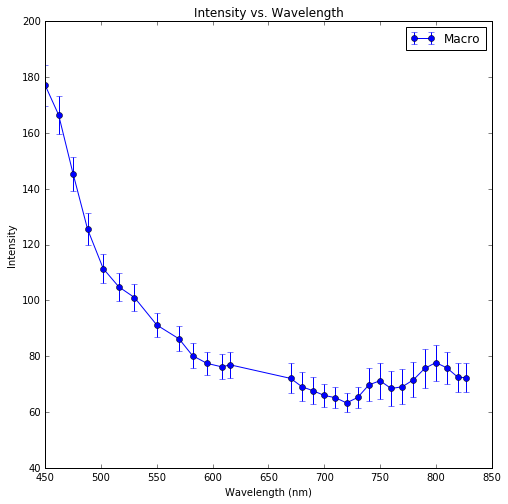

In [5]:
if macro is not None:
    
    # Load dataset:

    macro_files_dir = macro['sate_files_dir']
    macro_metadata_exp = macro['metadata_exp']
    additional_gain = macro['additional_gain']
    macro_roi_pixel_i = macro['sate_roi_pixel_i']
    macro_roi_size = macro['sate_roi_size'] 

    # Macro Wavelength:                               
    
    macro_wavelength = np.asarray([450, 462, 475, 488, 502, 516, 530, 550, 570, 582, 595, 608, 616, 670, 680, 690, 700, 710, 720, 730, 740, 750, 
                                   760 , 770, 780, 790, 800, 810, 820, 827])

    # Load Macro images:

    macro_filenames = os.listdir(macro_files_dir)
    macro_filenames.sort()
 
    if data_format == 'cube':

        macro_cube = load_tiff_datacube(macro_files_dir, macro_filenames) 

    elif data_format == 'roi':

        macro_roi = load_tiff_datacube_roi(macro_files_dir, macro_filenames, macro_roi_pixel_i, macro_roi_size)

        # Calculate mean and Std:

        macro_profile = np.mean(macro_roi, axis=(0,1) )
        macro_std = np.std(macro_roi, axis=(0,1) )
        
        ######################################################
        # Graph spectral signature mean + Standard deviation:
        ######################################################

        plt.figure(figsize=(8,8))
        plt.title('Intensity vs. Wavelength')
        plt.errorbar(macro_wavelength, macro_profile, yerr=macro_std, fmt='-ob', label='Macro')
        plt.xlabel('Wavelength (nm)')
        plt.ylabel('Intensity')
        plt.legend()
        

    

Scroll through datacube:

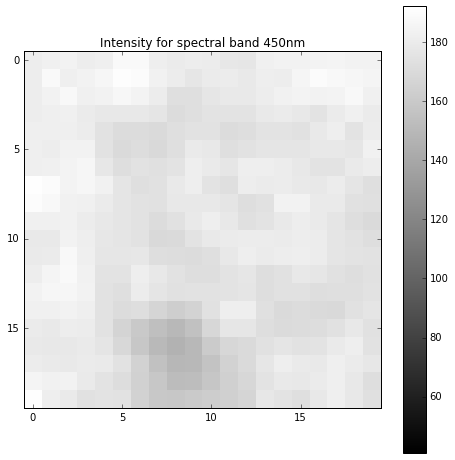

In [8]:
dataset = macro_roi
wav_data = macro_wavelength

interact(plot_image, wav=(0,len(wav_data)-1))

# Load Hyperion dataset:

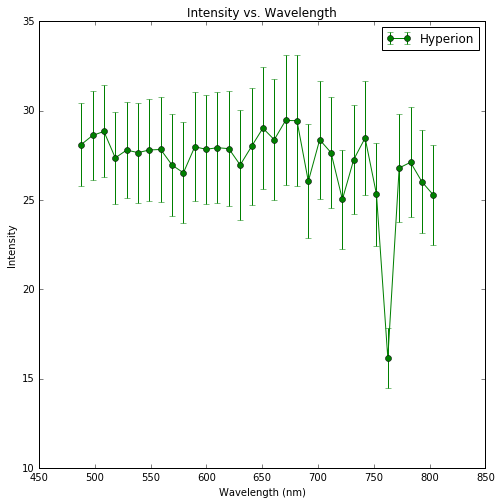

In [9]:
if hyp is not None:
    
    # Load dataset:
    
    hyperion_files_dir = hyp['hyperion_files_dir']
    hyp_roi_pixel_i = hyp['hyp_roi_pixel_i']
    hyp_roi_size = hyp['hyp_roi_size']

    HYP_SENSOR_LOOK_ANGLE = hyp['HYP_SENSOR_LOOK_ANGLE'] 
    HYP_SUN_AZIMUTH = hyp['HYP_SUN_AZIMUTH']
    HYP_SUN_ELEVATION = ['HYP_SUN_ELEVATION']
    
    # Hyperion Wavelength:          
    
    hyp_wavelength = np.loadtxt('resources/hyperion_wavelengths.txt')[13:45]
    
    # Radiometric values:
    
    hyp_gain = 0.025
    
    # Load Hyperion images:

    hyp_filenames = os.listdir(hyperion_files_dir)
    hyp_filenames.sort()

    if data_format == 'cube':

        hyp_cube = load_tiff_datacube(hyperion_files_dir, hyp_filenames[13:45]) * hyp_gain

    elif data_format == 'roi':

        hyp_roi = load_tiff_datacube_roi(hyperion_files_dir, hyp_filenames[13:45], hyp_roi_pixel_i, hyp_roi_size)  * hyp_gain

        # Calculate mean and Std:
        
        hyp_profile = np.mean(hyp_roi, axis=(0,1) )
        hyp_std = np.std(hyp_roi, axis=(0,1) )
        
        ######################################################
        # Graph spectral signature mean + Standard deviation:
        ######################################################
            
        plt.figure(figsize=(8,8))
        plt.title('Intensity vs. Wavelength')
        plt.errorbar(hyp_wavelength, hyp_profile, yerr=hyp_std, fmt='-og', label='Hyperion')
        plt.xlabel('Wavelength (nm)')
        plt.ylabel('Intensity')
        plt.legend()
  

Scroll through datacube:

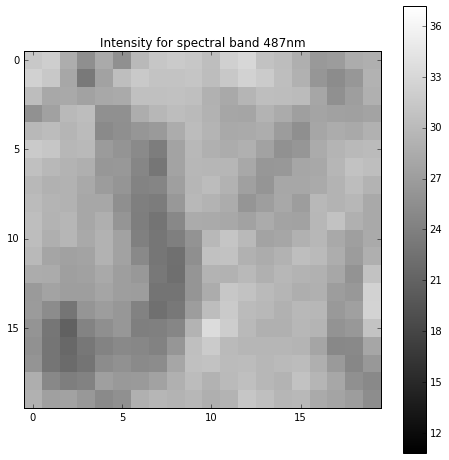

In [12]:
dataset = hyp_roi
wav_data = hyp_wavelength

interact(plot_image, wav=(0,len(wav_data)-1))

# Load Landsat dataset:

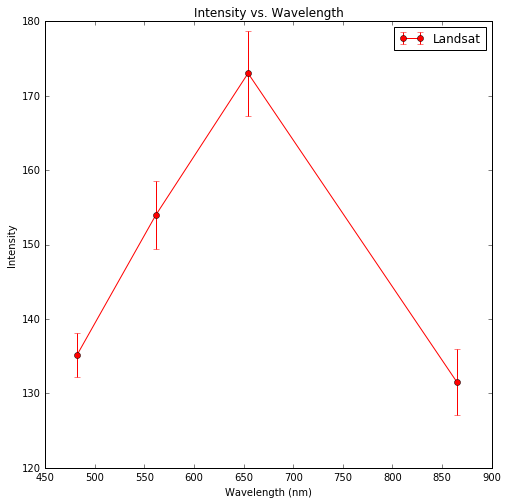

In [13]:
if landsat_dataset is not None:

    land_files_dir = landsat_dataset['files_dir']
    land_roi = landsat_dataset['roi_pixel_i1']
    land_roi_size = landsat_dataset['roi_size1']
    mult = landsat_dataset['RADIANCE_MULT_BAND']
    add = landsat_dataset['RADIANCE_ADD_BAND'] 
    
    # Landsat wavelength:
    
    landsat_wav = np.asarray([(512 - 452)/2 + 452, (590 - 533)/2 + 533, (673 - 636)/2 + 636, (879 - 851)/2 + 851])
       
    # Load Landsat images:
    
    landsat_filenames = os.listdir(land_files_dir)
    landsat_filenames.sort()
    
    if data_format == 'cube':

        landsat_cube = load_tiff_datacube(land_files_dir, landsat_filenames[0:4])

        # Transform raw data into spectral radiance:

        landsat_cube_radiance =  (np.multiply(landsat_cube, mult) + add )

    elif data_format == 'roi':

        landsat_roi = load_tiff_datacube_roi(land_files_dir, landsat_filenames[0:4], land_roi, land_roi_size)

        # Transform raw data into spectral radiance:
        
        landsat_roi_radiance = (np.multiply(landsat_roi, mult) + add )
        
        # Calculate mean and Std:
        
        landsat_profile = np.mean(landsat_roi_radiance, axis=(0,1) )
        landsat_std = np.std(landsat_roi_radiance, axis=(0,1) )

        ######################################################
        # Graph spectral signature mean + Standard deviation:
        ######################################################
        
        plt.figure(figsize=(8,8))
        plt.title('Intensity vs. Wavelength')
        plt.errorbar(landsat_wav, landsat_profile, yerr=landsat_std, fmt='-or', label='Landsat')
        plt.xlabel('Wavelength (nm)')
        plt.ylabel('Intensity')
        plt.legend()

Scroll through datacube:

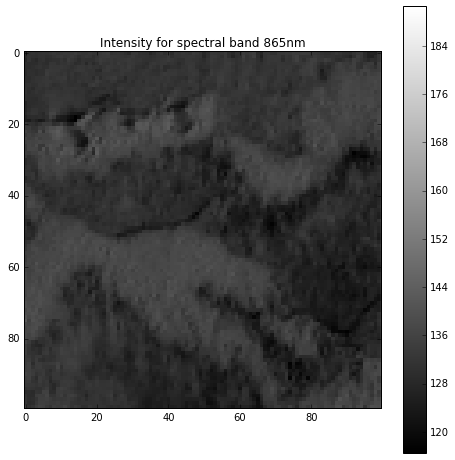

In [14]:
dataset = landsat_roi_radiance
wav_data = landsat_wav

interact(plot_image, wav=(0,len(wav_data)-1))

# Load Sentinel dataset:


    Observations: 
    
    1. Sentinel's raw data correspond to TOA reflectance. It is necessary to transform this data to TOA radiance in order to compare with Macro or Sentinel.
    
    2. The different spectral bands of Sentinel have different spatial resolutions. Please be careful when selecting the respective ROIs. 

/usr/lib/python2.7/dist-packages/PIL/Image.py:2224: DecompressionBombWarning: Image size (120560400 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning)


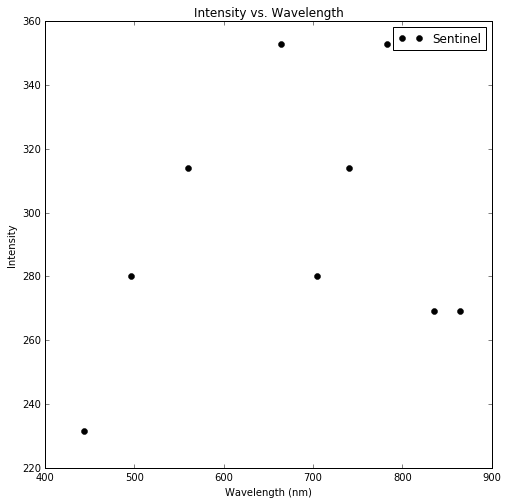

In [15]:
if sentinel_dataset is not None:
   
    # Load dictionary:
    
    sent_files_dir = sentinel_dataset['files_dir']
    sent_roi10 = sentinel_dataset['roi_pixel_i10']
    sent_roi_size10 = sentinel_dataset['roi_size10']
    sent_roi20 = sentinel_dataset['roi_pixel_i20']
    sent_roi_size20 = sentinel_dataset['roi_size20']
    sent_roi60 = sentinel_dataset['roi_pixel_i60']
    sent_roi_size60 = sentinel_dataset['roi_size60']   
    
    u_reflectance_corr = sentinel_dataset['U_reflectance_corr']
    Sun_Angle_Zenith = sentinel_dataset['Sun_Angle_Zenith']

    # Load Sentinel images:
    
    sent_filenames = os.listdir(sent_files_dir)
    sent_filenames.sort()
 
    # Sentinel Wavelengths:
    
    sent_wav = np.asarray([443.9, 496.6, 560.0, 664.5, 703.9, 740.2, 782.5, 835.1, 864.8, 945.0, 1373.5, 1613.7, 2202.4])
    sent_wav10 = sent_wav[(2-1,3-1,4-1,8-1),]
    sent_wav20 = sent_wav[(5-1,6-1,7-1,9-1),]
    sent_wav60 = sent_wav[1-1]
 
    # Sentinel spatial resolution:
    
    selected10 = [sent_filenames[n] for n in [2-1,3-1,4-1,8-1]]
    selected20 = [sent_filenames[n] for n in [5-1,6-1,7-1,9-1]]
    
    # Radiometric values:
    
    solar_irradiance_list = np.asarray([1913.57, 1941.63, 1822.61, 1512.79, 1425.56, 1288.32, 1163.19, 1036.39, 955.19, 813.04, 367.15, 245.59, 85.25])[0:9]
    quant_val = 10000
    
    if data_format == 'cube':
        
        sent_cube10 = load_png_datacube(sent_files_dir, selected10)
        sent_cube20 = load_png_datacube(sent_files_dir, selected20)
        sent_cube60 = np.asarray(Image.open(os.path.join(sent_files_dir, sent_filenames[1-1])))
        
        # Convert reflectivity to reflectance (relative values):
        
        sent_cube10_radiance = np.multiply(sent_cube10, solar_irradiance_list[(2-1,3-1,4-1,8-1),])/quant_val
        sent_cube20_radiance = np.multiply(sent_cube20, solar_irradiance_list[(5-1,6-1,7-1,9-1),])/quant_val
        sent_cube60_radiance = np.multiply(sent_cube60, solar_irradiance_list[1-1])/quant_val
        
        # Convert reflectivity to reflectance (absolute values):
        
        scaled_sent_cube10_radiance = sent_cube10_radiance * np.cos(Sun_Angle_Zenith * np.pi / 180) / (np.pi * u_reflectance_corr) 
        scaled_sent_cube20_radiance = sent_cube20_radiance * np.cos(Sun_Angle_Zenith * np.pi / 180) / (np.pi * u_reflectance_corr) 
        scaled_sent_cube60_radiance = sent_cube60_radiance * np.cos(Sun_Angle_Zenith * np.pi / 180) / (np.pi * u_reflectance_corr) 

    elif data_format == 'roi':
        
        sent_roi10 = load_png_datacube_roi(sent_files_dir, selected10, sent_roi10, sent_roi_size10)
        sent_roi20 = load_png_datacube_roi(sent_files_dir, selected20, sent_roi20, sent_roi_size20)
        sent_roi60 = np.asarray(Image.open(os.path.join(sent_files_dir, sent_filenames[1-1])))
    
        # Convert reflectivity to reflectance (relative values):
        
        sent_roi10_radiance = np.multiply(sent_roi10, solar_irradiance_list[(2-1,3-1,4-1,8-1),])/quant_val
        sent_roi20_radiance = np.multiply(sent_roi20, solar_irradiance_list[(5-1,6-1,7-1,9-1),])/quant_val
        sent_roi60_radiance = np.multiply(sent_roi60, solar_irradiance_list[1-1])/quant_val
    
        # Calculate spectral mean and standard deviation:
        
        sent_profile10 = np.mean(sent_roi10_radiance, axis=(0,1))
        sent_profile20 = np.mean(sent_roi10_radiance, axis=(0,1))
        sent_profile60 = np.mean(sent_roi60_radiance)
    
        sent_std10 = np.std(sent_roi10_radiance, axis=(0,1))
        sent_std20 = np.std(sent_roi10_radiance, axis=(0,1))
        sent_std60 = np.std(sent_roi60_radiance)
    
        # Concatenate all images:
        
        sent_radiance = np.concatenate((sent_profile10, sent_profile20, [sent_profile60]),axis=0)
        sent_std = np.concatenate((sent_std10, sent_std20, [sent_std60]),axis=0)
        sent_wavelength = np.concatenate((sent_wav10, sent_wav20, [sent_wav60]),axis=0)

        # Convert reflectivity to reflectance (absolute values):
        
        scaled_sent_radiance = sent_radiance * np.cos(Sun_Angle_Zenith * np.pi / 180) / (np.pi * u_reflectance_corr) 
        
        ######################################################
        # Graph spectral signature mean + Standard deviation:
        ######################################################
        
        plt.figure(figsize=(8,8))
        plt.title('Intensity vs. Wavelength')
        plt.plot(sent_wavelength, scaled_sent_radiance, 'ok', label='Sentinel')
        plt.xlabel('Wavelength (nm)')
        plt.ylabel('Intensity')
        plt.legend()
        plt.show()

Scroll through datacube: (10m resolution)

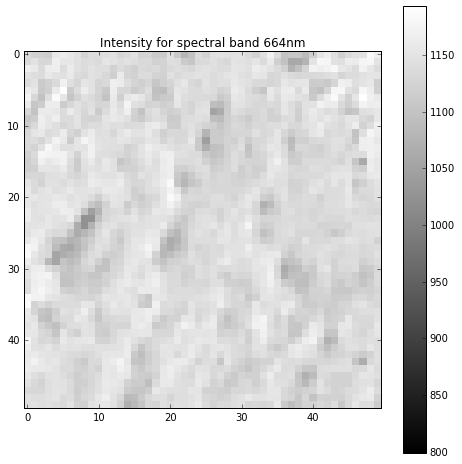

In [37]:
dataset = sent_roi10_radiance
wav_data = sent_wav10

interact(plot_image, wav=(0,len(wav_data)-1))

Scroll through datacube: (20m resolution)

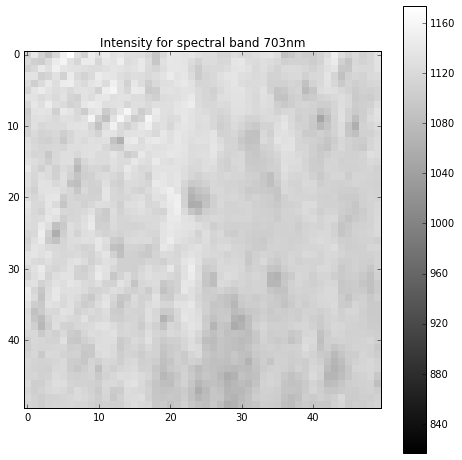

In [38]:
dataset = sent_roi20_radiance
wav_data = sent_wav20

interact(plot_image, wav=(0,len(wav_data)-1))

Scroll through datacube: (60m resolution)

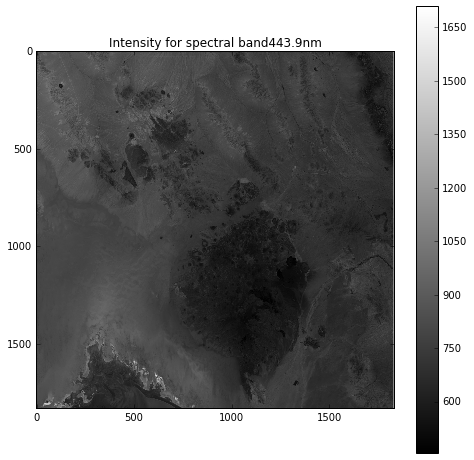

In [39]:
dataset = sent_roi60_radiance
wav_data = sent_wav60

plt.figure(figsize=(8,8))
plt.imshow(dataset,cmap='gray', interpolation='none', vmin=dataset.min(), vmax=dataset.max())
plt.title('Intensity for spectral band' + str(wav_data) + 'nm')
axes = plt.gca()
plt.colorbar()